# **Exploratory Data Analysis on Netflix Movies and TV Shows**



**What is Exploratory Data Analysis?**

Exploratory data analysis (EDA for short) is what data analysts do with large sets of data, looking for patterns and summarizing the dataset’s main characteristics beyond what they learn from modeling and hypothesis testing. EDA is a philosophy that allows data analysts to approach a database without assumptions. When a data analyst employs EDA, it’s like they’re asking the data to tell them what they don’t know. 

It is an approach to data analysis, that uses these techniques:

- Maximize insights into a dataset.
- Uncover underlying structures.
- Extract important variables.
- Detect outliers and anomalies.
- Test underlying assumptions.
- Determine optimal factor settings.


## **Outline of Project**

* **Select and download real-world dataset**
* **Import and Install all the libraries**
* **Perform data preparation & cleaning**
* **Ask & answer questions about the data**
* **Perform exploratory analysis & visualization**
* **Summarize your inferences & write a conclusion**


## **Select and download real-world dataset**

This dataset is available on Kaggle. It contains information about the NetFlix movies and TV shows.It includes the information about type of the movie,	title	of the movie, director name,	cast,	country,	date_added,	release_year,rating of the movie, duration,	listed_in and descriptionthe. 
We will analyze this dataset and draw some conclusions.


Dataset Link - https://www.kaggle.com/shivamb/netflix-shows

**Downloading the Dataset**

Let's download the data into the Jupyter notebook. We'll use the **opendatasets library** from Jovian. 

Let's install and import it, and use the download method.

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade -q
import jovian 
project_name = "NetFlix-and-TV-shows"
# Execute this to save new versions of the notebook
jovian.commit(project = project_name) 

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajbarai05/netflix-and-tv-shows


'https://jovian.ai/pankajbarai05/netflix-and-tv-shows'

In [ ]:
# Install opendatsets library to downlaod the data from kaggle by using link of the d
!pip install jovian opendatasets --upgrade --quiet

#Kaggle Dataset URL
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 
import opendatasets as od

# Downloading the dataset
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pankajbarai
Your Kaggle Key: ··········


100%|██████████| 1.34M/1.34M [00:00<00:00, 42.7MB/s]

In [ ]:
# Convert dataset into CSV file
datasets_url_to_csv = '/content/netflix-shows/netflix_titles.csv'

## **Import and Install all the Libraries**

In [ ]:
#Loading required libraries

!pip install jovian pandas-profiling numpy plotly --upgrade --quiet
!pip install pyyaml==5.4.1 --quiet
!pip3 uninstall statsmodels -y --quiet
!pip3 install statsmodels==0.10.0rc2 --pre --user --quiet
!pip install sidetable --quiet

     |████████████████████████████████| 268 kB 14.4 MB/s 
     |████████████████████████████████| 15.2 MB 58.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 102 kB 52.5 MB/s 
     |████████████████████████████████| 4.7 MB 32.7 MB/s 
     |████████████████████████████████| 9.8 MB 41.8 MB/s 
     |████████████████████████████████| 690 kB 47.0 MB/s 
     |████████████████████████████████| 296 kB 41.4 MB/s 
     |████████████████████████████████| 636 kB 13.1 MB/s 
     |████████████████████████████████| 8.1 MB 12.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.8.0 requires statsmodels>=0.12.1, but you have statsmodels 0.10.0rc2 which is incompatible.
pandas-profiling 3.3.0 requires statsmodels<0.14,>=0.13.2, but you have statsmodels 0.10.0rc2 which is incompatible.


In [ ]:
# Pandas is a data analysis and manipulation library for Python
import pandas as pd 

# NumPy is the fundamental package for scientific computing in Python
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
import matplotlib.pyplot as plt

# It sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Seaborn is a library for making statistical graphics in Python.
import seaborn as sns

# Plotly Express is a new high-level Python visualization library
import plotly.express as px

#The plotly.figure_factory module contains dedicated functions for creating very specific types of plots
import plotly.figure_factory as ff

#Sidetable is an open-sourced Python library that builds simple but useful summary tables of pandas DataFrame.
#Sidetable is a tool that can be useful for data analysis and explorations.
import sidetable as stb 


print('All required libraries are imported')

All required libraries are imported


## **Data Preparation and Cleaning**



 - Load the dataset using read_csv method of Pandas library 
 - Explore the number of rows & columns, ranges of values etc.
 - Handle missing, incorrect, invalid data and dropping duplicates data

**Loading Dataset**

Loading dataset using `DataFrame.read_csv()`

In [ ]:
# Load the datasets using pandas
show_dataset = pd.read_csv('netflix-shows/netflix_titles.csv')

## Get the dataframe
show_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Here what we can tell by looking at the Dataframe

- Above Dataset contain both Netfix Movie and Tv shows data for Analysis.
- The file provides total 12 columns which include title,release,director,etc.
- Data is provided from March 2019 to Sept 2021.

These Data contains original information and its up to date .

Information about datset using **`DataFrame.info()`**

---
The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
# Check the datasets info
show_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Here we can see**

- Datatype of each columns which is int64, object, and float
- Number of rows is 8807.
- Number of columns is 12
- File size after loading the datset 825.8+ KB.

Now we have a rough idea of our datset and we can further procees for analysis

Shape of dataset using **`DataFrame.shape()`**

---

Which tells us the number of rows and columns of a given DataFrame.

In [ ]:
#Check the shape of datasets
show_dataset.shape

(8807, 12)

Description about the datasets using **`DataFrame.describre()`**

---

The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

It is used to view some basic statistical details like percentile, mean, std etc

But in these dataframe we have only one int64 datatype i.e. release_year

In [ ]:
#Description of datasets
show_dataset.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Column names of the dataset using **`DataFrame.columns`**


In [ ]:
# Check all the columns of dataset
show_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## **Dealing with Null Values**

* We can use **`DataFrame.isnull()`** to check the null values
* We can use **`DataFrame.isnull().sum()`** to get the sum of all null values
* OR we can created our own function using pandas dataframe to find missing values
* We can also use **`DataFrame.stb.missing()`** to chcek missing values and their percentage.

In [ ]:
# show_dataset.isnull().sum()
# show_dataset.stb.missing()
miss = pd.DataFrame({'cols_name': show_dataset.columns,
                     'Missing_value': [any(show_dataset[x].isnull()) for x in show_dataset.columns],
                     'count_': [sum(show_dataset[x].isnull()) for x in show_dataset.columns],
                     'Percentage': ([sum(show_dataset[x].isnull())*100/ show_dataset.shape[0] for x in show_dataset.columns]),
                     })
miss.sort_values(by = 'count_', ascending= False)



,cols_name,Missing_value,count_,Percentage
3,director,True,2634,29.908028
5,country,True,831,9.435676
4,cast,True,825,9.367549
6,date_added,True,10,0.113546
8,rating,True,4,0.045418
9,duration,True,3,0.034064
0,show_id,False,0,0.000000
1,type,False,0,0.000000
2,title,False,0,0.000000
7,release_year,False,0,0.000000



* **Director** columns having highest number of data missing which is 2634 almost 30 percent.
* Followed by **cast** columnsi.e. 825 and **country** columns i.e. 831 data missing.
* Where **date_added**, **rating** and **duration** having less number of data missing which is not even 1percent.

###  **1.What is the percentage of null values and plot a chart for null values?**

In [ ]:
# we already calculated missing values above but Let's again get the percentage of Null values using isna().sum()
null_value = show_dataset.isna().sum().sort_values(ascending = False)/len(show_dataset)*100
print(null_value[:7])

director      29.908028
country        9.435676
cast           9.367549
date_added     0.113546
rating         0.045418
duration       0.034064
show_id        0.000000
dtype: float64


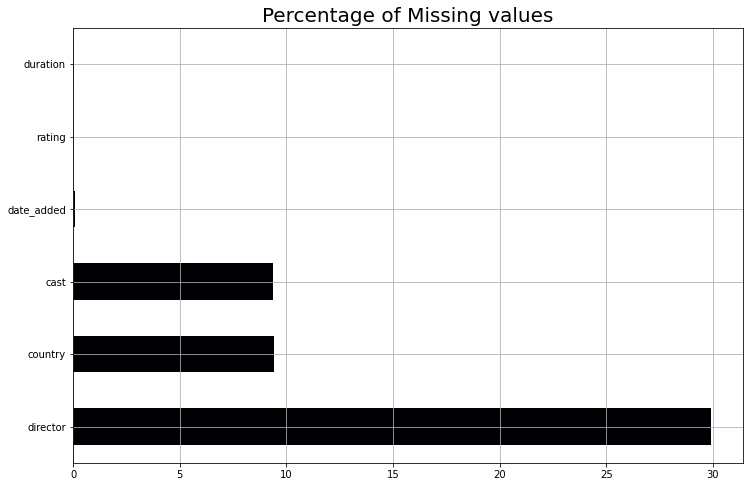

In [ ]:
#plot a bar chart to see the missing peercentage
plt.title('Percentage of Missing values', fontsize = 20)
null_value[null_value!=0].plot(kind = 'barh', grid = True , cmap = 'inferno', figsize = (12,8));

- **date_added** columns having less number of data missing so we going to drop the missing value.

Dropping missing value using **`DataFrame.dropna()`**


---
The dropna() method removes the rows that contains NULL values. 

The dropna() method returns a new DataFrame object unless the inplace parameter is set to True.

In [ ]:
#Dropping missing date_added columns data
show_dataset.dropna(subset = ['date_added'],inplace= True)

In [ ]:
#Now checking shape of DataFrame after dropping date_added missing column data
show_dataset.shape

(8797, 12)

### **2.What are the percentage of types of Movie and Tv shows?**

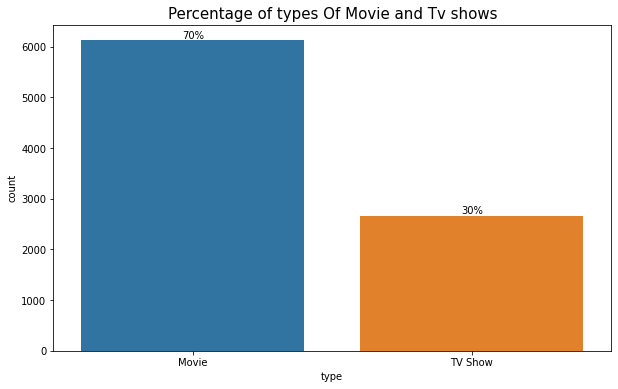

In [ ]:
#plot Bar graph to check percentage of type of movie and tv shows
plt.figure(figsize = (10,6))
plt.title('Percentage of types Of Movie and Tv shows',fontsize=15)
# show_dataset.type.value_counts().plot(kind='bar');
ax = sns.countplot(x = show_dataset['type'])
for p in ax.patches:
  x = p.get_bbox().get_points()[:,0]
  y = p.get_bbox().get_points()[1,1]
  ax.annotate('{:.2g}%'.format(100.*y/len(show_dataset)),(x.mean(), y), ha = 'center', va = 'bottom')
plt.show()

- We can see from above that Movie type having highest number of percentage i.e. 70% where TV show having around 30%.
- so we can say that Netflix have more focus towards movie rather than TV shows.

Earlier we check date_added columns datatype is object type through  **`DataFrame.info()`**

- So Pandas does not know that this column is a date. 
- We can convert it into a datetime column using the **`pd.to_datetime`** method.

In [ ]:
show_dataset['date_added'] = pd.to_datetime(show_dataset['date_added'])
show_dataset.info()
# from dateutil.parser import parse

# from collections import Counter

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.1+ MB


Now we can see that it now has the datatype `datetime64`. We can now extract different parts of the data into separate columns, using the **`DatetimeIndex`** class ([view docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html)).

In [ ]:
#Adding new columns by extracting date_added column through DatetimeIndex

show_dataset['year'] = pd.DatetimeIndex(show_dataset['date_added']).year
show_dataset['month'] = pd.DatetimeIndex(show_dataset['date_added']).month
show_dataset['day'] = pd.DatetimeIndex(show_dataset['date_added']).day
show_dataset['weekday'] = show_dataset['date_added'].dt.day_name()


In [ ]:
#checking dataset after adding year , month, day and weekday columns
show_dataset.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,Friday


In [ ]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajbarai05/netflix-and-tv-shows


'https://jovian.ai/pankajbarai05/netflix-and-tv-shows'

## **Ask and Answer Questions About the Data**

* In which countries, number of content is more?
* who is the most popular director with more number of contents on Netflix?
* In which year more number of Movies or Tv shows realsed?
* What are Number of contents being released month wise?
* What is the most popular Genre of Movies?
* Who is the most Popular Actor/Actress played more roles in NetFlix movies or Tv shows?
* Common words in Descriptions?
* The ratings of the content(Movies/TV Shows)?
* Number of contents released on which days?


## **Exploratory Analysis and Visualization**


Let's make the copy of dataset using **`df.copy()`** function.
so that whatever we make changes will happen only in copy dataframe not in original dataframe.

In [ ]:
# Copy of DataFrame
copied_dataset = show_dataset.copy()

### **3. In which countries, number of content is more?**


To get an idea about how country with most number of content distribution looks like we need to plot using Bar plot.

- A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. 
- The bar plots can be plotted horizontally or vertically. 
- A bar chart describes the comparisons between the discrete categories. 
- One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

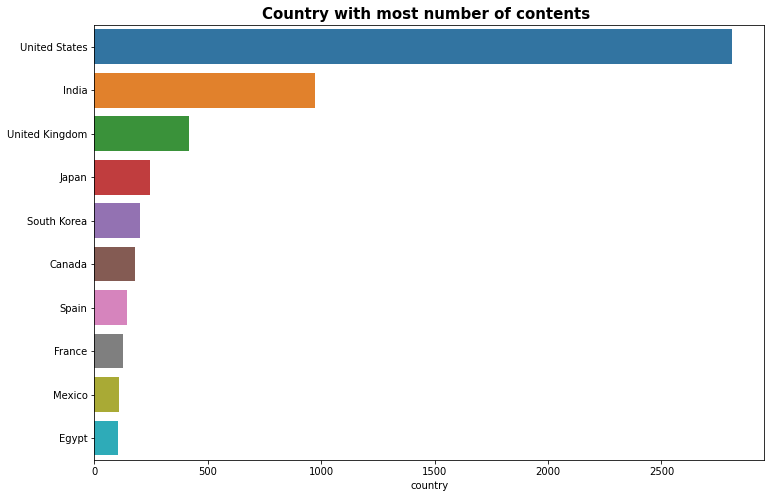

In [ ]:
# Let's plot Bar graph

top_country = copied_dataset['country'].value_counts()[:10]    #Taking only top 10 data
plt.figure(figsize = (12,8))
plt.title('Country with most number of contents ', fontsize = 15, fontweight = 'bold')
sns.barplot(x = top_country, y = top_country.index , data = copied_dataset)
plt.show()

**Insights from above chart**

- Here we can see from the chart, United states is the only countries with most number of contents irrespective of types of contents i.e. Movies or Tv shows.
- India is on second number after U.S in creating more contents on Netflix.
- United kingdom, Japan, South Korea etc. are in the line below india.


### **4. who is the most popular director with more number of contents on Netflix?**

In [ ]:
#Plot director distribution 
Director = copied_dataset.director.value_counts()[:10]  #taking only top 10 data

fig = px.bar(x=Director.index, y = Director, title= 'Director with more number of contents on Netflix')
fig.update_layout(
    xaxis_title="Director",
    yaxis_title="Number of contents",
    font=dict(size=18))
fig.show()

**Insights from above chart**
- Here we can see that Rajiv Chilaka , who directed more numbers of contents on Netflix so we can say, he is most popular on Netflix.
- Raúl Campos, Jan Suter is on second number after Rajiv Chilaka, in terms of directing contents on netflix.

### **5.In which year more number of Movies or Tv shows realsed?**

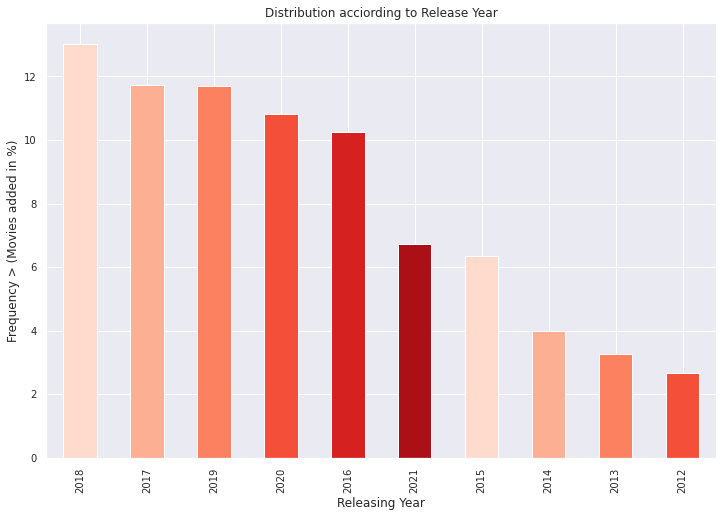

In [ ]:
#Plotting Realease_year distribution

c = copied_dataset['release_year'].value_counts(normalize=True)*100

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
c[:10].plot.bar(color = sns.color_palette('Reds'), title = 'Distribution acciording to Release Year',  fontsize = 10)
plt.xlabel('Releasing Year')
plt.ylabel('Frequency > (Movies added in %)')
plt.show()

**Insights from above chart**
- As per graph we can see that, in 2018 year more numbers of movies or tv shows released.
- And we can also see that it gradually increasing  from 2012 year.
- so we can say that, as we moving towards the future, OTT platform making its marks day by day. so in upcoming year we can see more contents.  

### **6.What are Number of contents being released month wise?**

- Seaborn Countplot function creates bar charts of the number of observations per category. 
- When you use sns. countplot , Seaborn literally counts the number of observations per category for a categorical variable, and displays the results as a bar chart.

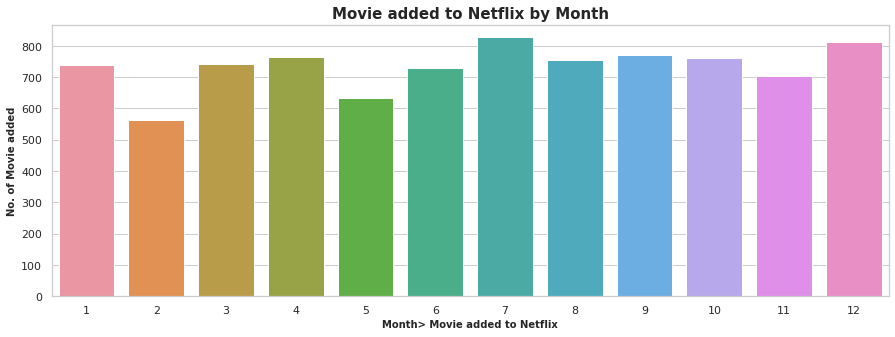

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
sns.countplot(data = copied_dataset, x= copied_dataset['month'])
plt.title('Movie added to Netflix by Month', fontsize = 15, fontweight='bold')
plt.xlabel('Month> Movie added to Netflix', fontsize = 10, fontweight='bold')
plt.ylabel('No. of Movie added',fontsize = 10, fontweight='bold')
plt.show()

**Insights from above graph**
- Approximately the content being released in each month is same.
- Or we can say in August and December is slightly higher number of contents being released.

Let's define a helper function that turns a column containing lists of values (like `copied_dataset['listed_in`) into a data frame with one column for each possible option.

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(', '):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

### **7. What is the most popular Genre of Movies?**

In [ ]:
listed = split_multicolumn(copied_dataset['listed_in'])
listed

,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,Romantic TV Shows,TV Comedies,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8803,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `copied_dataset['listed_in']` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

It appears that a total of 73 genre of movies/TV shows were included among the options. Let's aggregate these to identify the percentage of respondents.

We can now use the column-wise totals to identify the most common roles.

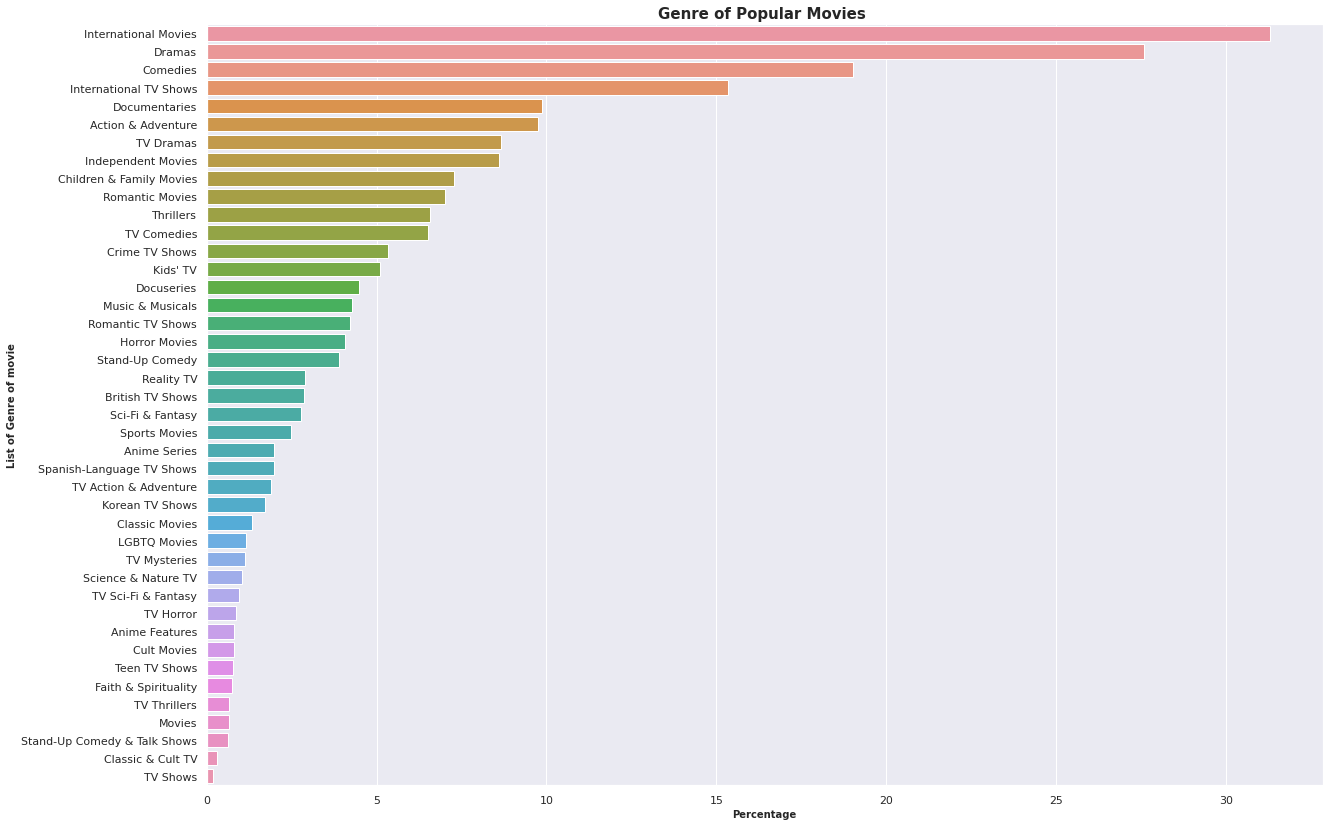

In [ ]:
#We can plot this information using a horizontal bar chart.

listed = listed.mean().sort_values(ascending=False)*100


sns.set()
plt.figure(figsize=(20,14))
plt.title('Genre of Popular Movies ', fontsize = '15', fontweight = 'bold')
sns.barplot(x = listed, y = listed.index)
plt.xlabel('Percentage', fontsize = '10', fontweight = 'bold')
plt.ylabel('List of Genre of movie', fontsize = '10', fontweight = 'bold')
plt.show()

**Insights from above chart**
- Movies can be hard to pin down when it comes to which genre they are most aligned with.
- International Movies are most dominated or loved by people as we can see from the above chart.
- After that Dramas, comedies are in top 3 place.
- Comedies genre are more impact and are more ahead in the race, people are more likely to watch comedies to relief there day to day life stress.


### **8. Who is the most Popular Actor/Actress played more roles in NetFlix movies or Tv shows?**

we will again use a helper function which we had defined earlier that turns a column containing lists of values into a data frame with one column for each possible option.

In [ ]:
popular_cast = split_multicolumn(copied_dataset['cast'])                  

In [ ]:
popular_cast = popular_cast.sum().sort_values(ascending=False)

In [ ]:
popular_cast[:40]

Anupam Kher            43
Shah Rukh Khan         35
Julie Tejwani          33
Takahiro Sakurai       32
Naseeruddin Shah       32
Rupa Bhimani           31
Akshay Kumar           30
Om Puri                30
Yuki Kaji              29
Paresh Rawal           28
Amitabh Bachchan       28
Boman Irani            27
Rajesh Kava            26
Vincent Tong           26
Andrea Libman          25
Kareena Kapoor         25
John Cleese            24
Samuel L. Jackson      24
Tara Strong            23
Fred Tatasciore        23
Jigna Bhardwaj         23
Daisuke Ono            22
Ashleigh Ball          21
Kay Kay Menon          21
Junichi Suwabe         21
Ajay Devgn             21
Nawazuddin Siddiqui    21
Nicolas Cage           21
Salman Khan            20
David Attenborough     20
Adam Sandler           20
Seth Rogen             19
Yuichi Nakamura        19
Gulshan Grover         19
Erin Fitzgerald        19
Morgan Freeman         19
James Franco           19
Fred Armisen           19
Mamoru Miyan

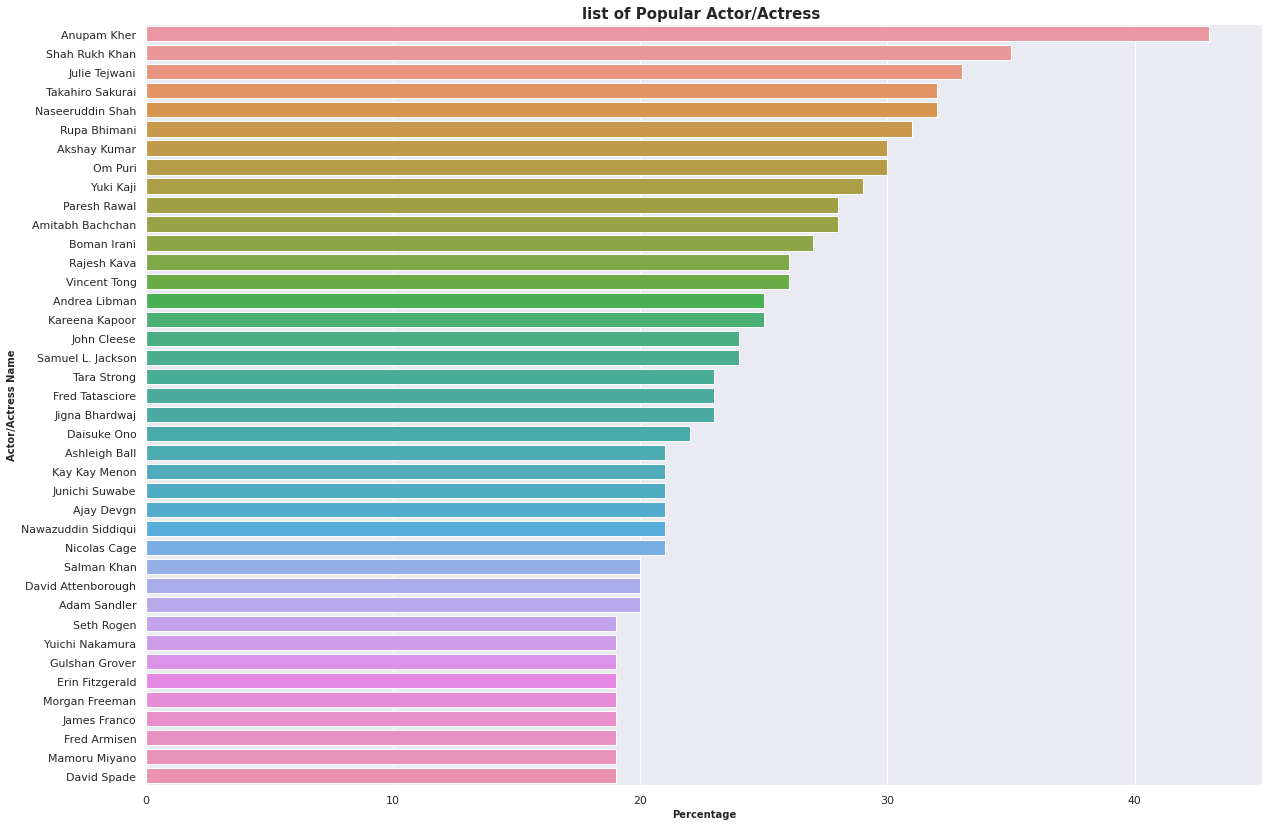

In [ ]:
#We can plot this information using a horizontal bar chart.

sns.set()
plt.figure(figsize=(20,14))
plt.title('list of Popular Actor/Actress ', fontsize = '15', fontweight = 'bold')
sns.barplot(x = popular_cast[:40], y = popular_cast.index[:40])
plt.xlabel('Percentage', fontsize = '10', fontweight = 'bold')
plt.ylabel('Actor/Actress Name', fontsize = '10', fontweight = 'bold')
plt.show()

**Insights from above graph**
- Anupam Kher has played many roles or features in more number of series or movies.
- Shahrukh khan and other actor also played many roles which featured on netfklix.
- These data is more from India as we see more actor or actress from India only.

### **8. Common words in Descriptions?**

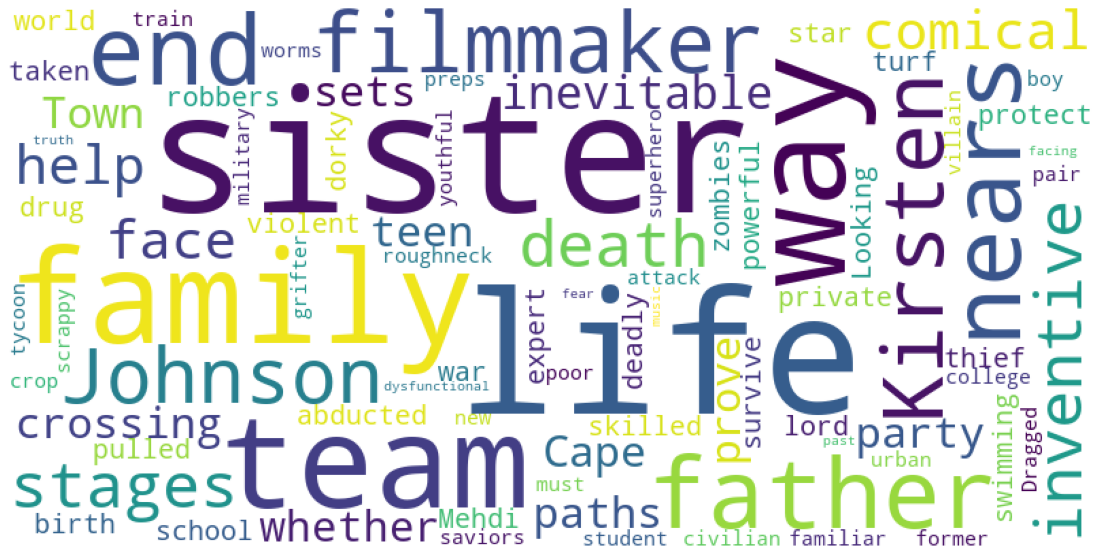

In [ ]:
# Generate a word cloud image to check the spread of diiferent company
from PIL import Image
from wordcloud import WordCloud
text = copied_dataset['description'].values
wordcloud = WordCloud(width=800, height=400, background_color='white',).generate(str(text))
# Display the generated image:
# the matplotlib way:


plt.figure( figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

**Insights from the word cloud**
* From the above word cloud, we can analyze that movie having description which contains words like sister,filmmaker,way, family, team,life etc.

### **9.The ratings of the content ?**

In [ ]:
df1 = copied_dataset[copied_dataset['type'] == 'TV Show']    #Separtaing the TV show into another dataframe df1
df2 = copied_dataset[copied_dataset['type'] == 'Movie']      #Separtaing the Movie into another dataframe df2

In [ ]:
#plotting the graph to see
import plotly.graph_objects as go
col = "rating"

vc1 = df1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = df2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

**Insights from above graph**
- TV-MA having highest common rating in both TV Shows and Movies.

### **10. Number of contents released on which days?**

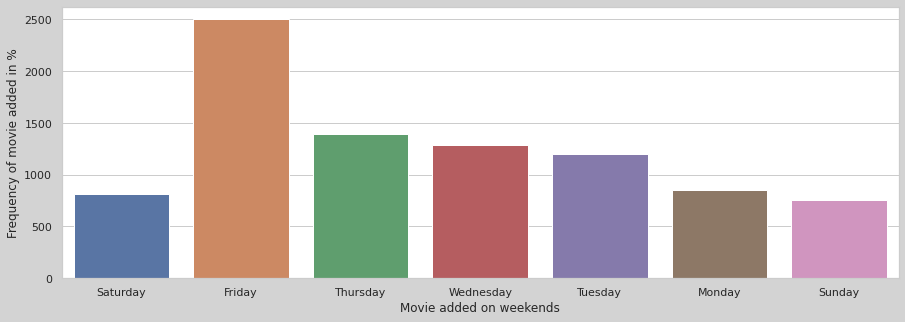

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=copied_dataset, x= copied_dataset['weekday'])
plt.ylabel('Frequency of movie added in %')
plt.xlabel('Movie added on weekends')
plt.show()

**Insights from above chart**
- Netflix add almost 25 to 20% contents on Friday or we can say that Tv shows /Movie are mostly released more on friday.
It must due to the weekend.

- Over the weekdays, less than 20% of content is added.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajbarai05/netflix-and-tv-shows


'https://jovian.ai/pankajbarai05/netflix-and-tv-shows'

## **Inferences and Conclusions**

We've drawn many inferences from the survey. Here's a summary of a few of them:

- United states is the only countries with most number of contents irrespective of types of contents i.e. Movies or Tv shows.

- India is on second number after U.S in creating more contents on Netflix.

- Rajiv Chilaka , who directed more numbers of contents on Netflix so we can say, he is most popular on Netflix.

- In 2018 year more numbers of Movies or TV shows released.
And we can also see that it gradually increasing from 2012 year.

- In August and December is slightly higher number of contents being released.

- Movies can be hard to pin down when it comes to which genre they are most aligned with.

- International Movies are most dominated or loved by people as we can see from the above chart.

- After that Dramas, comedies are in top 3 place.

- TV-MA having highest common rating in both TV Shows and Movies.

- Netflix added most of contents on Thursday and Friday.this maybe due to people like to watch movies on weekends

- Netflix gradually increasing trend after 2013

- Netflix added contents for both adult and kids




## **Future Work**

* Get the colorful map and try different columns.
* We can do stratified sampling for every country
* More analysis can be drawn out from this dataset. As we haven't used all columns in analaysis. If we can combine more columns , more interesting result will come out.
* We can also combine with some other interesting dataset ."

## **References**

* Plotly Documentation: https://plotly.com/python/
* EDA from scratch by Aakash NS: https://www.youtube.com/watch?v=kLDTbavcmd0&t=5315s
* Another EDA video from Aakash NS: https://www.youtube.com/watch?v=B4GbWjUFUGk
* Aakash N S. Analyzing Tabular Data with Pandas, 2021. https://jovian.ai/aakashns/python-pandas-data-analysis
* Pandas Documentation: https://pandas.pydata.org/docs/
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets

In [ ]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajbarai05/netflix-and-tv-shows


'https://jovian.ai/pankajbarai05/netflix-and-tv-shows'